<a href="https://colab.research.google.com/github/Dheerajjoe/NLPs-and-its-models./blob/master/apply_(4)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing some libraries**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Putting the dataset**

In [ ]:

df = pd.read_excel(r'/content/apply.csv.xlsx')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


**Classification of the sentiment column into the binary ones**

In [ ]:
a = pd.get_dummies(df['sentiment'])

In [ ]:
a

,empty,enthusiasm,love,neutral,sadness,surprise,worry
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0


**Concat the column into the dataset**

In [ ]:
df = pd.concat([df, a], axis = 1)

In [ ]:
df

,tweet_id,sentiment,content,empty,enthusiasm,love,neutral,sadness,surprise,worry
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,1,0,0,0,0,0,0
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0,0,0,0,1,0,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,0,0,0,0,1,0,0
3,1956967789,enthusiasm,wants to hang out with friends SOON!,0,1,0,0,0,0,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,0,0,0,1,0,0,0
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,0,0,0,0,0,0,1
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",0,0,0,0,1,0,0
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,0,0,0,0,0,0,1
8,1956969035,sadness,@charviray Charlene my love. I miss you,0,0,0,0,1,0,0
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,0,0,0,0,1,0,0


**Removing the existing col.**

In [ ]:
df.drop(['sentiment'], axis =1)

,tweet_id,content,empty,enthusiasm,love,neutral,sadness,surprise,worry
0,1956967341,@tiffanylue i know i was listenin to bad habi...,1,0,0,0,0,0,0
1,1956967666,Layin n bed with a headache ughhhh...waitin o...,0,0,0,0,1,0,0
2,1956967696,Funeral ceremony...gloomy friday...,0,0,0,0,1,0,0
3,1956967789,wants to hang out with friends SOON!,0,1,0,0,0,0,0
4,1956968416,@dannycastillo We want to trade with someone w...,0,0,0,1,0,0,0
5,1956968477,Re-pinging @ghostridah14: why didn't you go to...,0,0,0,0,0,0,1
6,1956968487,"I should be sleep, but im not! thinking about ...",0,0,0,0,1,0,0
7,1956968636,Hmmm. http://www.djhero.com/ is down,0,0,0,0,0,0,1
8,1956969035,@charviray Charlene my love. I miss you,0,0,0,0,1,0,0
9,1956969172,@kelcouch I'm sorry at least it's Friday?,0,0,0,0,1,0,0


The correlation of new emotions

In [ ]:
df_a = df.corr(method = 'pearson')
df_a

,tweet_id,empty,enthusiasm,love,neutral,sadness,surprise,worry
tweet_id,1.000000,-0.360744,-0.280945,0.321285,-0.111527,0.040915,0.266067,0.063605
empty,-0.360744,1.000000,-0.055556,-0.055556,-0.080845,-0.223607,-0.055556,-0.121716
enthusiasm,-0.280945,-0.055556,1.000000,-0.055556,-0.080845,-0.223607,-0.055556,-0.121716
love,0.321285,-0.055556,-0.055556,1.000000,-0.080845,-0.223607,-0.055556,-0.121716
neutral,-0.111527,-0.080845,-0.080845,-0.080845,1.000000,-0.325396,-0.080845,-0.177123
sadness,0.040915,-0.223607,-0.223607,-0.223607,-0.325396,1.000000,-0.223607,-0.489898
surprise,0.266067,-0.055556,-0.055556,-0.055556,-0.080845,-0.223607,1.000000,-0.121716
worry,0.063605,-0.121716,-0.121716,-0.121716,-0.177123,-0.489898,-0.121716,1.000000


**Importing seaborn for data visualization part**

<Figure size 720x720 with 0 Axes>

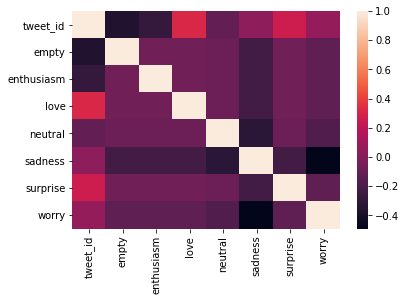

<Figure size 720x720 with 0 Axes>

In [ ]:
import seaborn as sns
sns.heatmap(df_a)
plt.figure(figsize = (10,10))

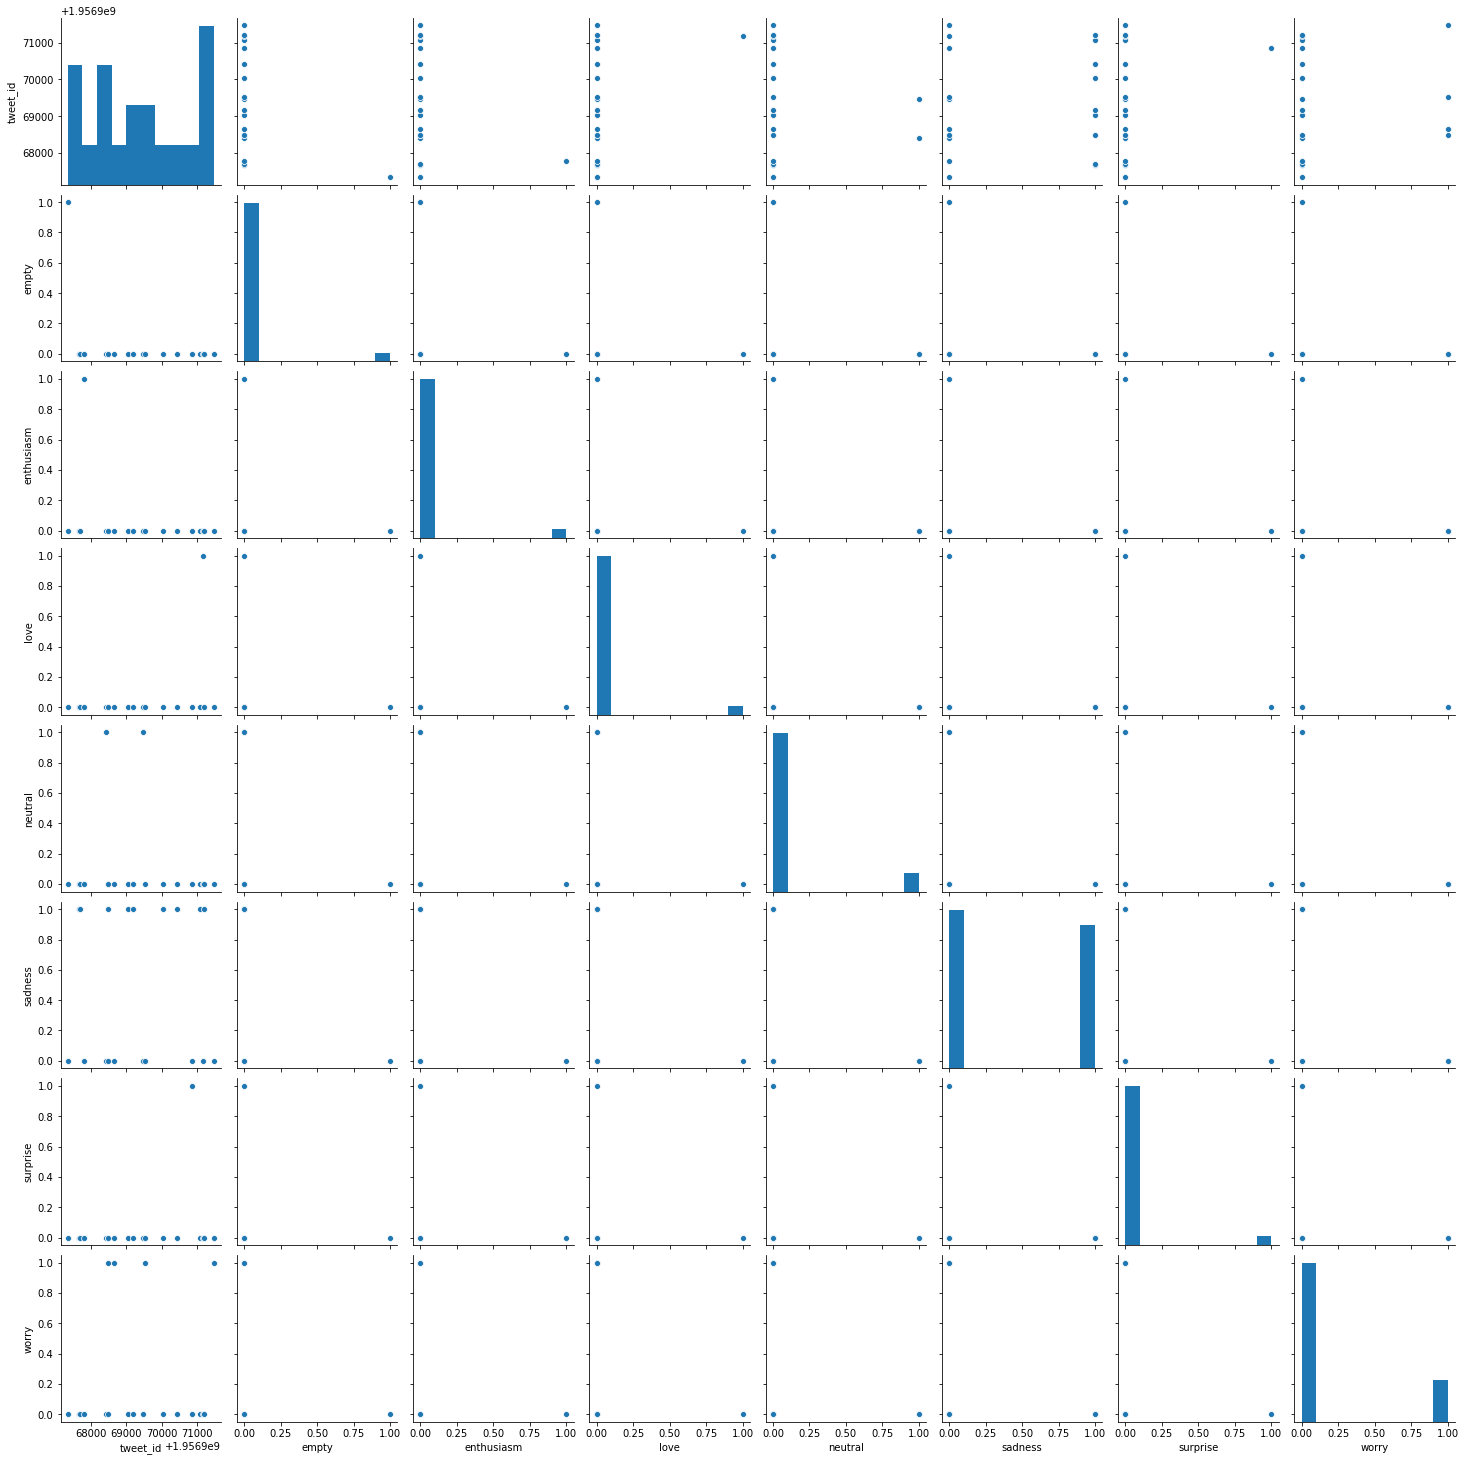

In [ ]:
sns.pairplot(df)

A Foundation of model

In [ ]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
import tensorflow as tf
tokenizer.fit_on_texts(df['content'])

In [ ]:
word_index = tokenizer.word_index

In [ ]:
label = df[['empty', 'enthusiasm', 'love', 'neutral', 'sadness', 'surprise', 'worry']]
label_data = label.values
label_data

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

A Single layer model without lstm

In [ ]:

"""vocab_size = 1000
embedding_dim = 16
max_length = 32
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(7, activation = 'softmax')
                        
])
model.summary()"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 49        
Total params: 16,151
Trainable params: 16,151
Non-trainable params: 0
_________________________________________________________________


**Modifying the input data with appending some zeros and dividing into equivalent**

In [ ]:
ab = tokenizer.texts_to_sequences(df['content'])
p = tf.keras.preprocessing.sequence.pad_sequences(
   ab, maxlen=32, dtype='int64', padding='post', truncating='post',
    value=0.0
)
training_test = np.array(p)
training_test.shape

(19, 32)

In [ ]:
num_epochs = 10
model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_test,label_data , epochs=num_epochs, validation_data=(training_test, label_data))


Epoch 1/10
1/1 [==============================] - 0s 196ms/step - loss: 1.9428 - accuracy: 0.1579 - val_loss: 1.9404 - val_accuracy: 0.2105
Epoch 2/10
1/1 [==============================] - 0s 22ms/step - loss: 1.9404 - accuracy: 0.2105 - val_loss: 1.9381 - val_accuracy: 0.4211
Epoch 3/10
1/1 [==============================] - 0s 26ms/step - loss: 1.9381 - accuracy: 0.4211 - val_loss: 1.9357 - val_accuracy: 0.4737
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 1.9357 - accuracy: 0.4737 - val_loss: 1.9332 - val_accuracy: 0.4737
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 1.9332 - accuracy: 0.4737 - val_loss: 1.9304 - val_accuracy: 0.4737
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9304 - accuracy: 0.4737 - val_loss: 1.9276 - val_accuracy: 0.4737
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 1.9276 - accuracy: 0.4737 - val_loss: 1.9246 - val_accuracy: 0.4737
Epoch 8/10
1/1 [==========

Lstm with bidirectionalities 

In [ ]:
num_epochs = 7
vocab_size = 1000
embedding_dim = 16
max_length = 32
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(7, activation='softmax')
])

learning_rate = 0.1
model_multiple_bidi_lstm.compile(loss='CategoricalCrossentropy',
                                 optimizer=tf.keras.optimizers.Adam(learning_rate),
                                 metrics=['accuracy'])
history = model_multiple_bidi_lstm.fit(training_test,label_data , epochs=num_epochs, validation_data=(training_test, label_data))



Epoch 1/7
1/1 [==============================] - 1s 1s/step - loss: 1.9512 - accuracy: 0.0526 - val_loss: 1.4945 - val_accuracy: 0.4737
Epoch 2/7
1/1 [==============================] - 0s 25ms/step - loss: 1.4945 - accuracy: 0.4737 - val_loss: 1.6280 - val_accuracy: 0.4737
Epoch 3/7
1/1 [==============================] - 0s 25ms/step - loss: 1.6280 - accuracy: 0.4737 - val_loss: 2.8105 - val_accuracy: 0.0526
Epoch 4/7
1/1 [==============================] - 0s 25ms/step - loss: 2.8105 - accuracy: 0.0526 - val_loss: 1.3460 - val_accuracy: 0.4211
Epoch 5/7
1/1 [==============================] - 0s 23ms/step - loss: 1.3460 - accuracy: 0.4211 - val_loss: 1.1170 - val_accuracy: 0.6842
Epoch 6/7
1/1 [==============================] - 0s 24ms/step - loss: 1.1170 - accuracy: 0.6842 - val_loss: 1.0016 - val_accuracy: 0.6842
Epoch 7/7
1/1 [==============================] - 0s 24ms/step - loss: 1.0016 - accuracy: 0.6842 - val_loss: 0.8113 - val_accuracy: 0.6842


**Plots of the accuracies relation**

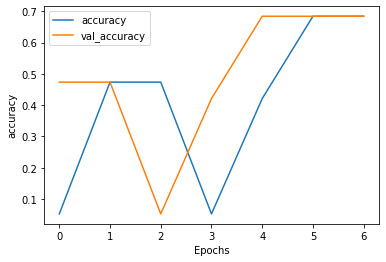

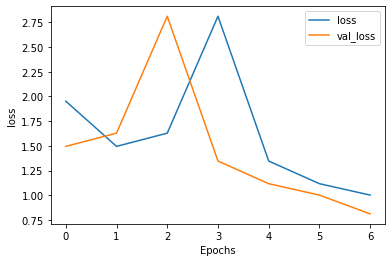

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**A test dataset**

In [ ]:
df_pop = pd.read_excel(r'/content/Book1.xlsx')
training = df_pop['content'].values
training

array(['@PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know',
       'How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend',
       "@raaaaaaek oh too bad! I hope it gets better. I've been having sleep issues lately too",
       "Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore",
       'No Topic Maps talks at the Balisage Markup Conference 2009   Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps',
       "I ate Something I don't know what it is... Why do I keep Telling things about food",
       "so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.",
       'On my way home n having 2 deal w underage girls drinking gin on da bus while talking bout keggers......damn i feel old',
       "@IsaacMascote  i'm sorry people are so rude to you, i

**Putting the dateset through the model**

In [ ]:

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(training)
  reviews_padded = pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x])
    print(classes[x])
    print('\n')
    return reviews_padded, reviews, classes

predict_review(model, training)
reviews_padded, classes, reviews = predict_review(model, training)
"""results = []
for x in range(len(reviews)):
   results.append(classes[x])
results = np.array(results)
class1 = np.array(results)
class2 = results.T[1]
class3 = results.T[2]
class4 = results.T[3]
class5 = results.T[4]
class6 = results.T[5]
class_last = results.T[6]
print(class1)
"""

@PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know
[0.14331661 0.13770238 0.14277902 0.14077754 0.14981645 0.1439819
 0.14162612]


@PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know
[0.14331661 0.13770238 0.14277902 0.14077754 0.14981645 0.1439819
 0.14162612]




'results = []\nfor x in range(len(reviews)):\n   results.append(classes[x])\nresults = np.array(results)\nclass1 = np.array(results)\nclass2 = results.T[1]\nclass3 = results.T[2]\nclass4 = results.T[3]\nclass5 = results.T[4]\nclass6 = results.T[5]\nclass_last = results.T[6]\nprint(class1)\n'

Maximum accuracies and the indices 

In [ ]:
print(reviews[0].max())
print(reviews[1].max())
print(reviews[2].max())
print(reviews[3].max())
print(reviews[4].max())
print(reviews[5].max())
print(reviews[6].max())
l = []
for i in range(0, 6):
    l.append(reviews[i].max())
print(l)

0.14981645
0.14986312
0.15083168
0.1498055
0.149898
0.151135
0.14887483
[0.14981645, 0.14986312, 0.15083168, 0.1498055, 0.149898, 0.151135]


In [ ]:

#take indices along with the number.
for i in range(len(reviews)):
       print(reviews[i].max(), np.where(reviews == np.amax(reviews[i])))

0.14981645 (array([0]), array([4]))
0.14986312 (array([1]), array([4]))
0.15083168 (array([2]), array([4]))
0.1498055 (array([3]), array([4]))
0.149898 (array([4]), array([4]))
0.151135 (array([5]), array([4]))
0.14887483 (array([6]), array([4]))
0.14950916 (array([7]), array([4]))
0.14789489 (array([8]), array([4]))
0.15112668 (array([9]), array([4]))
0.15137556 (array([10]), array([4]))
